# Testing qipQST

In [2]:
%load_ext autoreload

%autoreload 2
import qipQST as qst
import numpy as np

import matplotlib.pyplot as plt

plt.style.use('dark_background')

In [2]:
tau = 0.1
guess = 0

In [3]:
# idlePulse = qst.ConstantPulse(tau, 0, 0, 0)
# idleGate = qst.QuantumGate()
# idleGate.appendPulse(idlePulse)

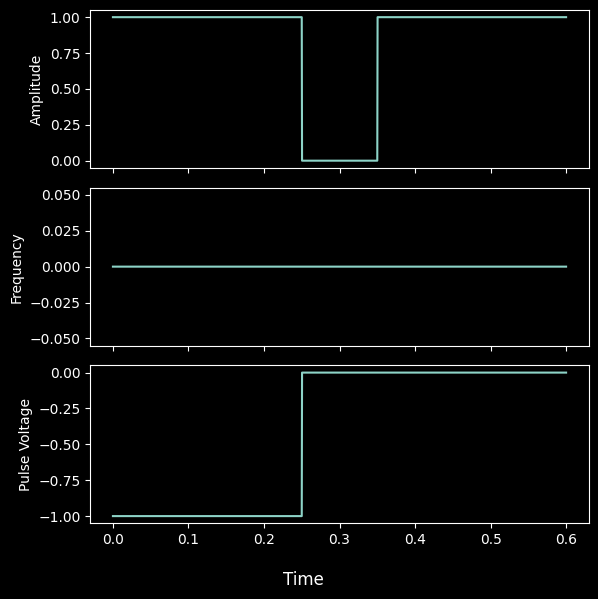

In [4]:
ramseyCircuit = qst.QuantumCircuit(guess)
ramseyCircuit.appendGate(qst.PiO2X())
ramseyCircuit.appendGate(qst.IdleGate(tau))
ramseyCircuit.appendGate(qst.PiO2Y())
ramseyCircuit.plotCircuitWaveform()

In [5]:
testSimulator = qst.PulseSimulator()
testSimulator.setQubit(qst.Qubit(0))
testSimulator.setCircuit(ramseyCircuit)
testSimulator.setTimeSteps(1, 10000)

In [6]:
testResult = testSimulator.simulateCircuit(1, 10000)

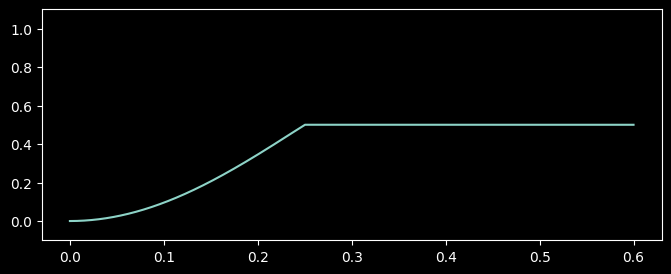

In [7]:
testResult.plotStates()

# Ramsey

## Sweep Guess

In [18]:
guessResonances = np.linspace(-0.5, 0.5, 101).tolist()

In [19]:
guessResult = qst.ramsey.sweepGuess(guessResonances, 1.5, 100, "Y")

100%|██████████| 101/101 [00:00<00:00, 242.18it/s]


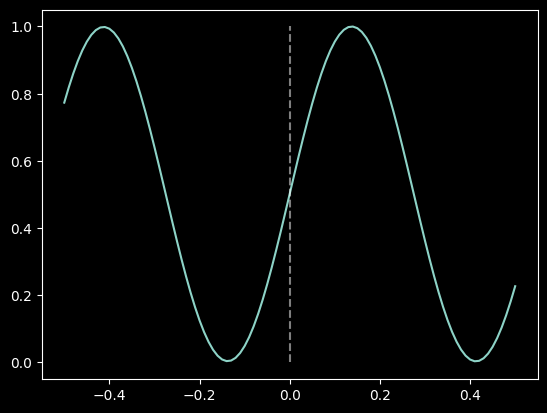

In [20]:
plt.plot(guessResonances, guessResult)
plt.vlines([0], 0, 1, linestyles="--", alpha=0.5)
plt.show()

## Sweep Tau

In [11]:
taus = np.linspace(0, 10, 101).tolist()

In [12]:
tauResults = qst.ramsey.sweepTau(taus, 0.1)

  0%|          | 0/101 [00:00<?, ?it/s]

100%|██████████| 101/101 [00:01<00:00, 55.05it/s]


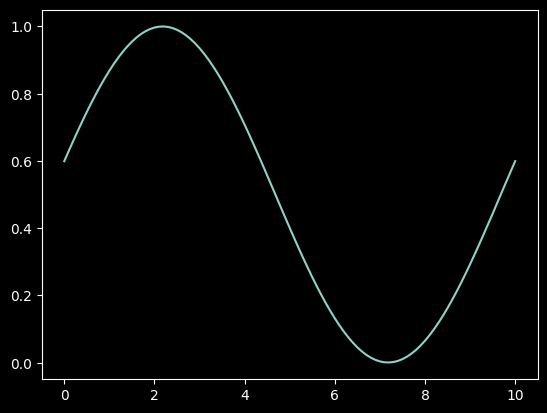

In [13]:
plt.plot(taus, tauResults)
plt.show()

## Sweep Both

In [14]:
guessResonances = np.linspace(-3, 3, 101).tolist()
taus = np.linspace(0, 2, 101).tolist()

In [ ]:
bothResultsX = qst.ramsey.sweepGuessAndTau(taus, guessResonances, numIterations=100)
bothResultsY = qst.ramsey.sweepGuessAndTau(taus, guessResonances, numIterations=100, secondGate="Y")

100%|██████████| 101/101 [00:23<00:00,  4.25it/s]


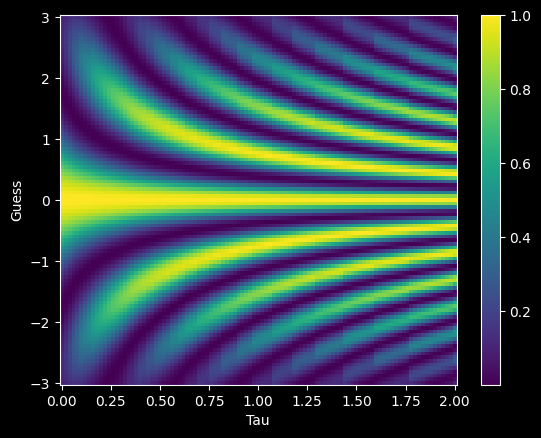

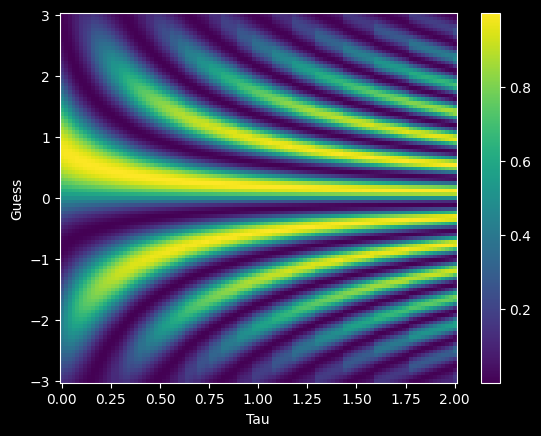

In [16]:
X, Y = np.meshgrid(taus, guessResonances)
pcolorm = plt.pcolormesh(X, Y, bothResultsX, shading="nearest")
plt.colorbar(pcolorm)
plt.ylabel("Guess")
plt.xlabel("Tau")
plt.title("")
plt.show()

pcolorm = plt.pcolormesh(X, Y, bothResultsY, shading="nearest")
plt.colorbar(pcolorm)
plt.ylabel("Guess")
plt.xlabel("Tau")
plt.title("")
plt.show()